## Setup Python Environment

The next cell sets up the dependencies in required for the notebook, run it.

In [2]:
# Setup environment
!apt-get -qq install xxd
!pip install pandas numpy matplotlib
!pip install tensorflow==2.0.0-rc1

ERROR: Could not find a version that satisfies the requirement tensorflow==2.0.0-rc1 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0)
ERROR: No matching distribution found for tensorflow==2.0.0-rc1


#CLEAN DATASET

In [18]:
import pandas as pd
import glob
import os

# Caminho onde estão os arquivos (ajuste se necessário)
caminho_arquivos = "/content/"  # Coloque o caminho onde os arquivos estão no Colab
arquivos = glob.glob(caminho_arquivos + "*.csv")  # Supondo que os arquivos sejam CSV

# Função para agrupar arquivos com o mesmo prefixo
def agrupar_arquivos(arquivos, prefixo):
    arquivos_agrupados = [arquivo for arquivo in arquivos if prefixo in arquivo]
    dfs = []

    for arquivo in arquivos_agrupados:
        # Ler o arquivo e forçar limpeza
        df = pd.read_csv(arquivo, skip_blank_lines=True)

        # Corrigir possíveis linhas duplicadas de cabeçalhos
        if 'deviceID' in df.iloc[0].values:  # Checa se a primeira linha repete o cabeçalho
            df.columns = df.iloc[0]  # Ajusta os cabeçalhos
            df = df[1:]  # Remove a linha duplicada

        # Forçar remoção de espaços nas colunas e valores
        df.columns = df.columns.str.strip()  # Limpa nomes das colunas
        df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)  # Limpa valores em células

        dfs.append(df)

    # Concatenar os DataFrames
    df_concatenado = pd.concat(dfs, ignore_index=True)

    # Selecionar colunas e remover duplicatas
    colunas_desejadas = ['deviceID', 'aX', 'aY', 'aZ', 'gX', 'gY', 'gZ']
    df_concatenado = df_concatenado[colunas_desejadas].drop_duplicates()

    # Garantir remoção de cabeçalhos remanescentes como valores
    df_concatenado = df_concatenado[df_concatenado['deviceID'] != 'deviceID']  # Remove cabeçalhos como dados

    return df_concatenado, arquivos_agrupados

# Prefixos dos arquivos
prefixos = ["caminhando", "marcha", "parado", "pulando"]

# Juntar arquivos com prefixos iguais
for prefixo in prefixos:
    df_resultado, arquivos_para_excluir = agrupar_arquivos(arquivos, prefixo)
    novo_arquivo = f"{caminho_arquivos}{prefixo}.csv"
    df_resultado.to_csv(novo_arquivo, index=False)
    print(f"Arquivo {novo_arquivo} salvo com sucesso!")

    # Excluir arquivos originais
    for arquivo in arquivos_para_excluir:
        os.remove(arquivo)
        print(f"Arquivo {arquivo} excluído com sucesso!")


Arquivo /content/caminhando.csv salvo com sucesso!
Arquivo /content/caminhando1.csv excluído com sucesso!
Arquivo /content/caminhando2.csv excluído com sucesso!
Arquivo /content/marcha.csv salvo com sucesso!
Arquivo /content/marcha1.csv excluído com sucesso!
Arquivo /content/marcha2.csv excluído com sucesso!
Arquivo /content/parado.csv salvo com sucesso!
Arquivo /content/parado1.csv excluído com sucesso!
Arquivo /content/parado2.csv excluído com sucesso!
Arquivo /content/pulando.csv salvo com sucesso!
Arquivo /content/pulando1.csv excluído com sucesso!
Arquivo /content/pulando2.csv excluído com sucesso!


<ipython-input-18-c4f33fb150f5>:25: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)  # Limpa valores em células
<ipython-input-18-c4f33fb150f5>:25: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)  # Limpa valores em células
<ipython-input-18-c4f33fb150f5>:25: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)  # Limpa valores em células
<ipython-input-18-c4f33fb150f5>:25: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)  # Limpa valores em células
<ipython-input-18-c4f33fb150f5>:25: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lam

# Graph Data (optional)

We'll graph the input files on two separate graphs, acceleration and gyroscope, as each data set has different units and scale.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

<ipython-input-9-394d93f22b94>:9: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aX'], 'g.', label='x', linestyle='solid', marker=',')
<ipython-input-9-394d93f22b94>:10: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aY'], 'b.', label='y', linestyle='solid', marker=',')
<ipython-input-9-394d93f22b94>:11: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aZ'], 'r.', label='z', linestyle='solid', marker=',')


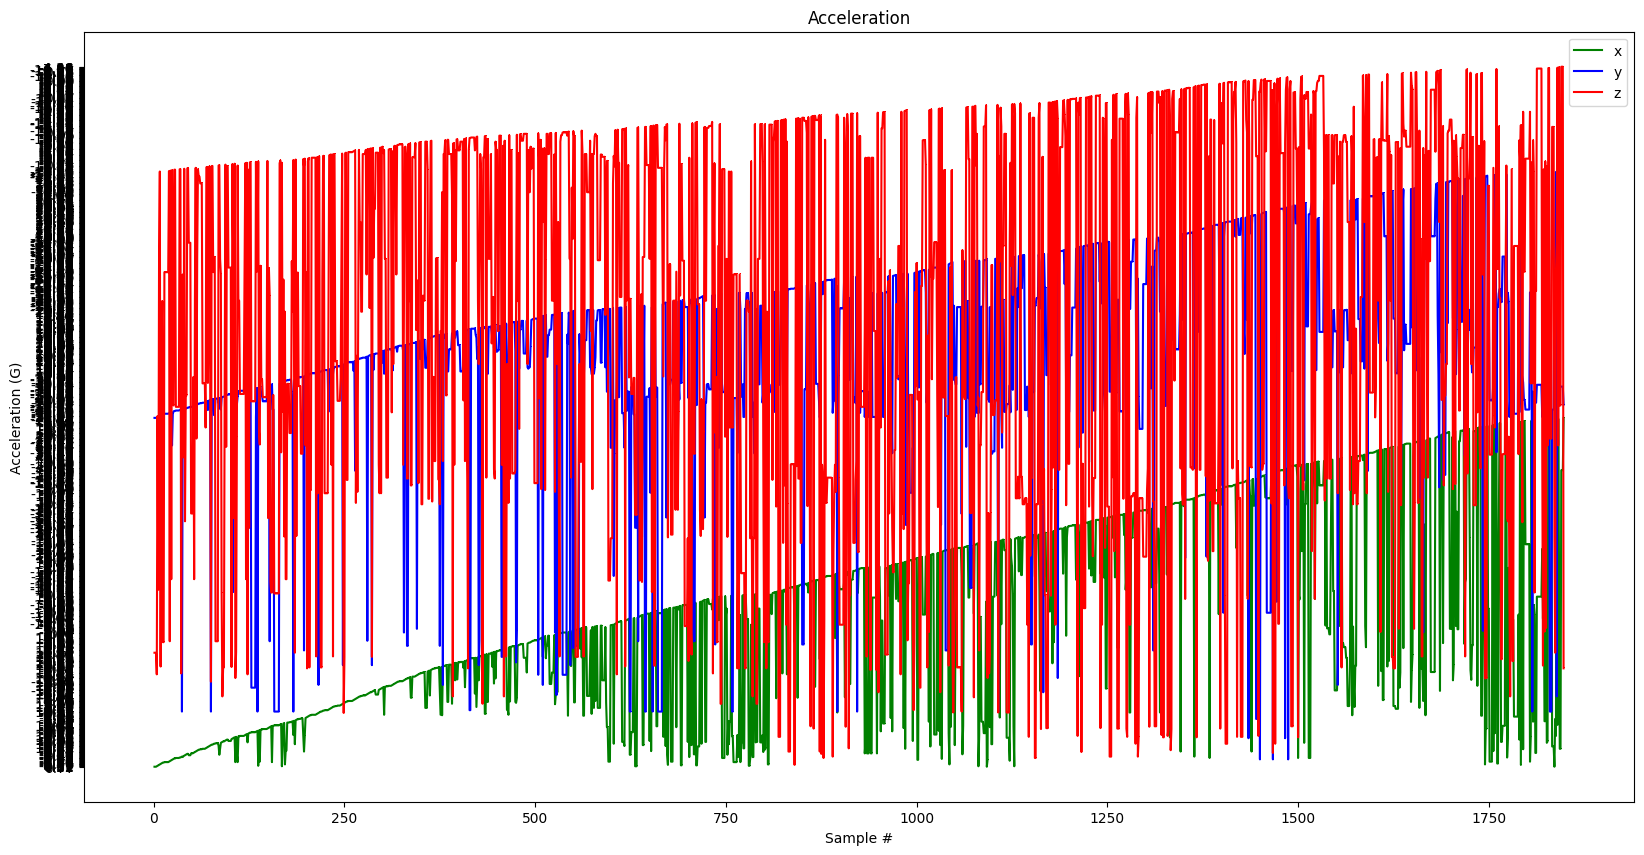

<ipython-input-9-394d93f22b94>:18: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gX'], 'g.', label='x', linestyle='solid', marker=',')
<ipython-input-9-394d93f22b94>:19: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gY'], 'b.', label='y', linestyle='solid', marker=',')
<ipython-input-9-394d93f22b94>:20: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gZ'], 'r.', label='z', linestyle='solid', marker=',')


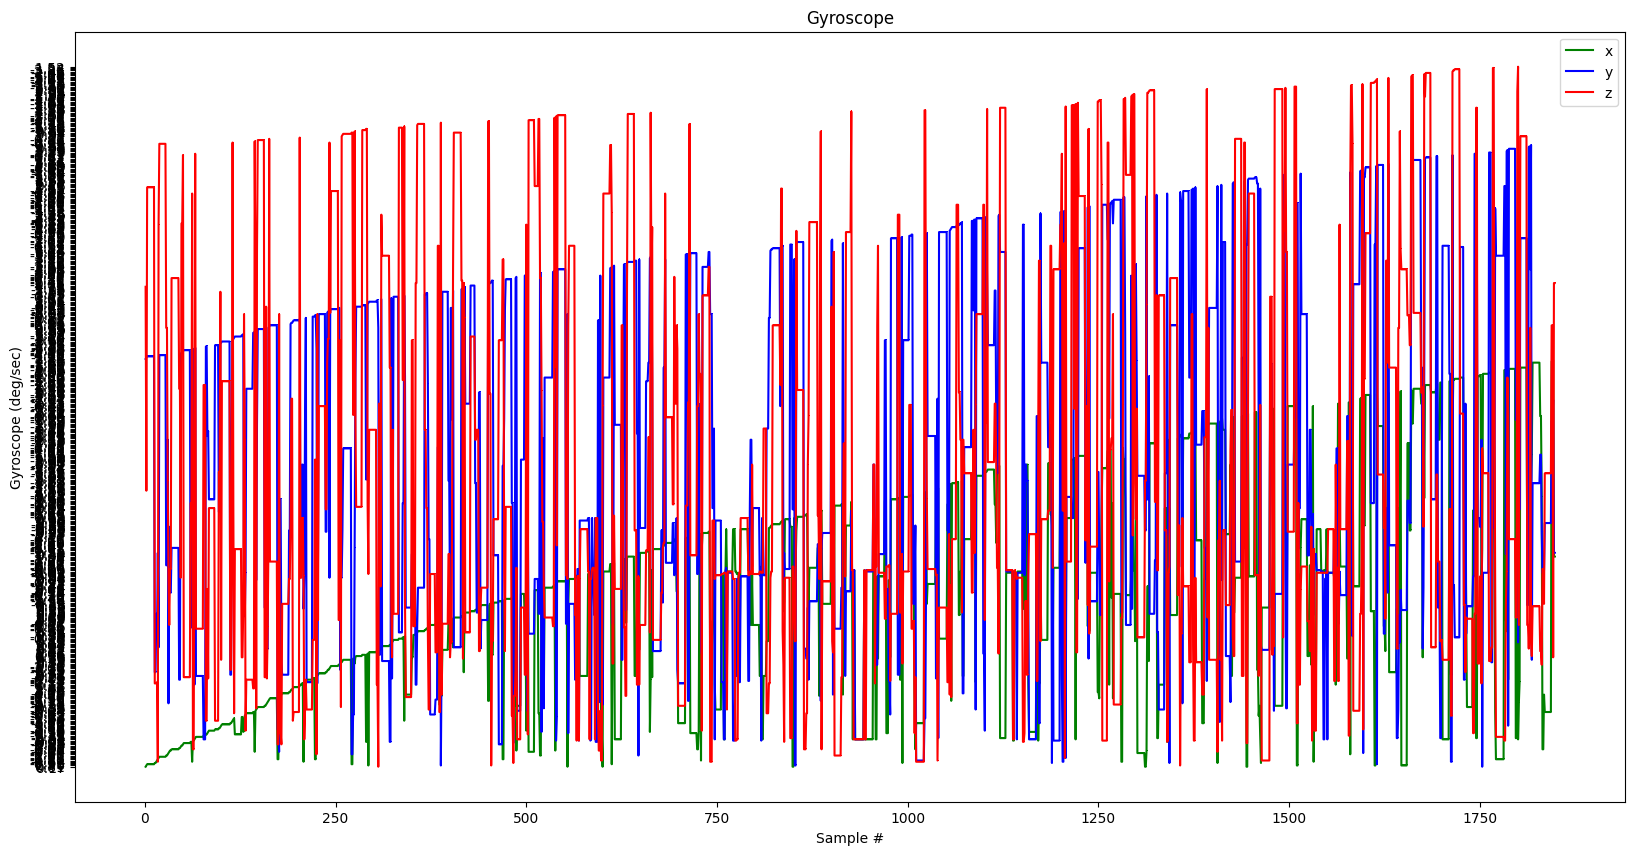

In [9]:
filename = "caminhando.csv"

df = pd.read_csv("/content/" + filename)

index = range(1, len(df['aX']) + 1)

plt.rcParams["figure.figsize"] = (20,10)

plt.plot(index, df['aX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['aY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['aZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Acceleration")
plt.xlabel("Sample #")
plt.ylabel("Acceleration (G)")
plt.legend()
plt.show()

plt.plot(index, df['gX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['gY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['gZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Gyroscope")
plt.xlabel("Sample #")
plt.ylabel("Gyroscope (deg/sec)")
plt.legend()
plt.show()


<ipython-input-10-8499518bf5f1>:9: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aX'], 'g.', label='x', linestyle='solid', marker=',')
<ipython-input-10-8499518bf5f1>:10: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aY'], 'b.', label='y', linestyle='solid', marker=',')
<ipython-input-10-8499518bf5f1>:11: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aZ'], 'r.', label='z', linestyle='solid', marker=',')


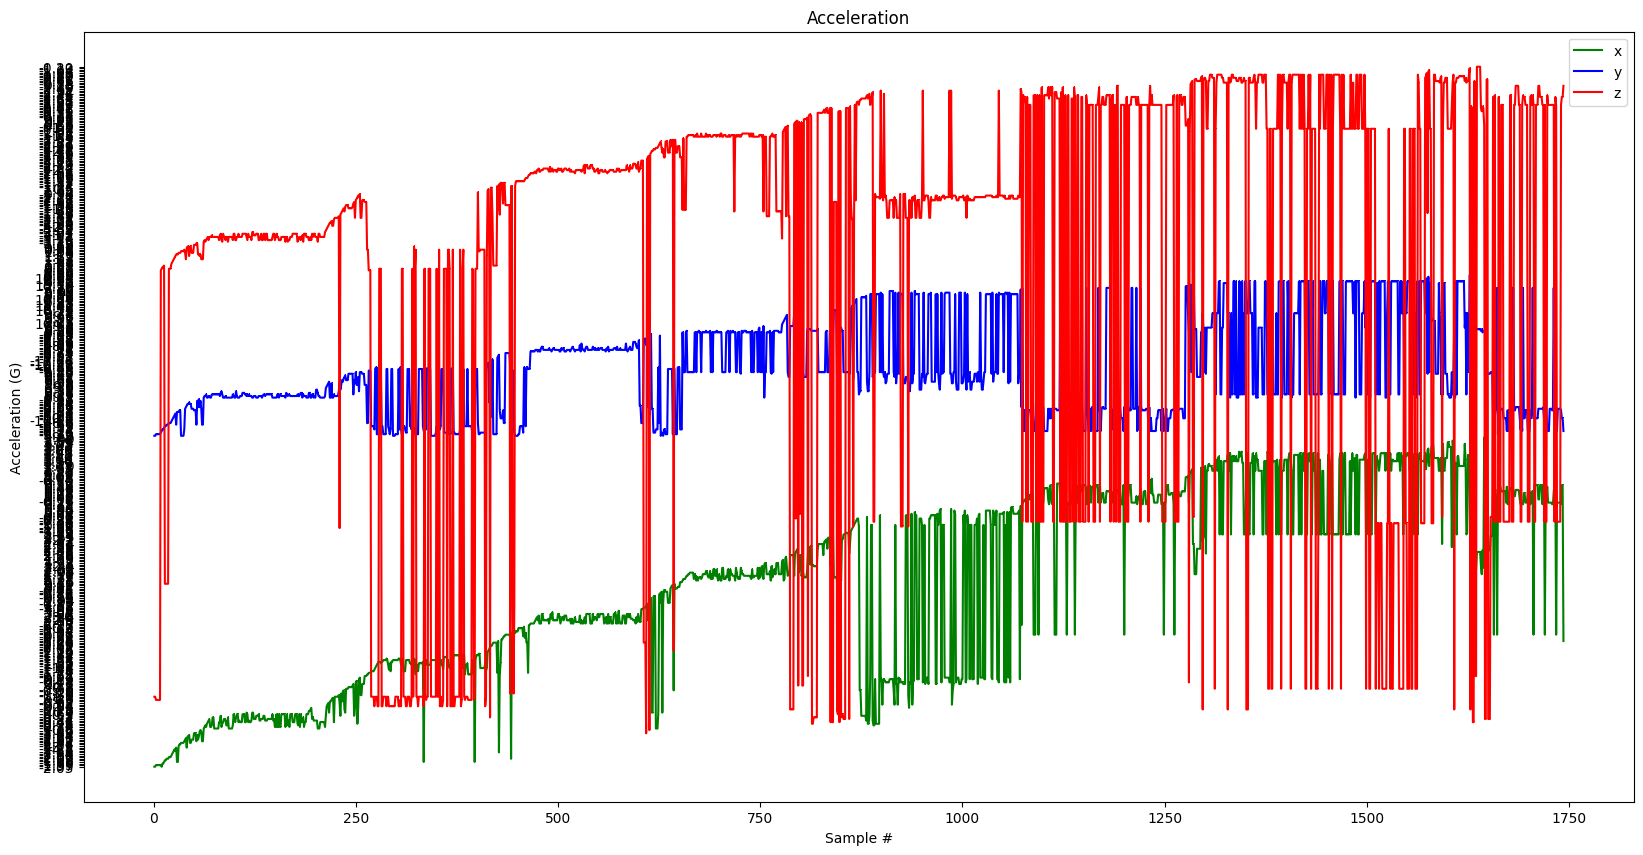

<ipython-input-10-8499518bf5f1>:18: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gX'], 'g.', label='x', linestyle='solid', marker=',')
<ipython-input-10-8499518bf5f1>:19: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gY'], 'b.', label='y', linestyle='solid', marker=',')
<ipython-input-10-8499518bf5f1>:20: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gZ'], 'r.', label='z', linestyle='solid', marker=',')


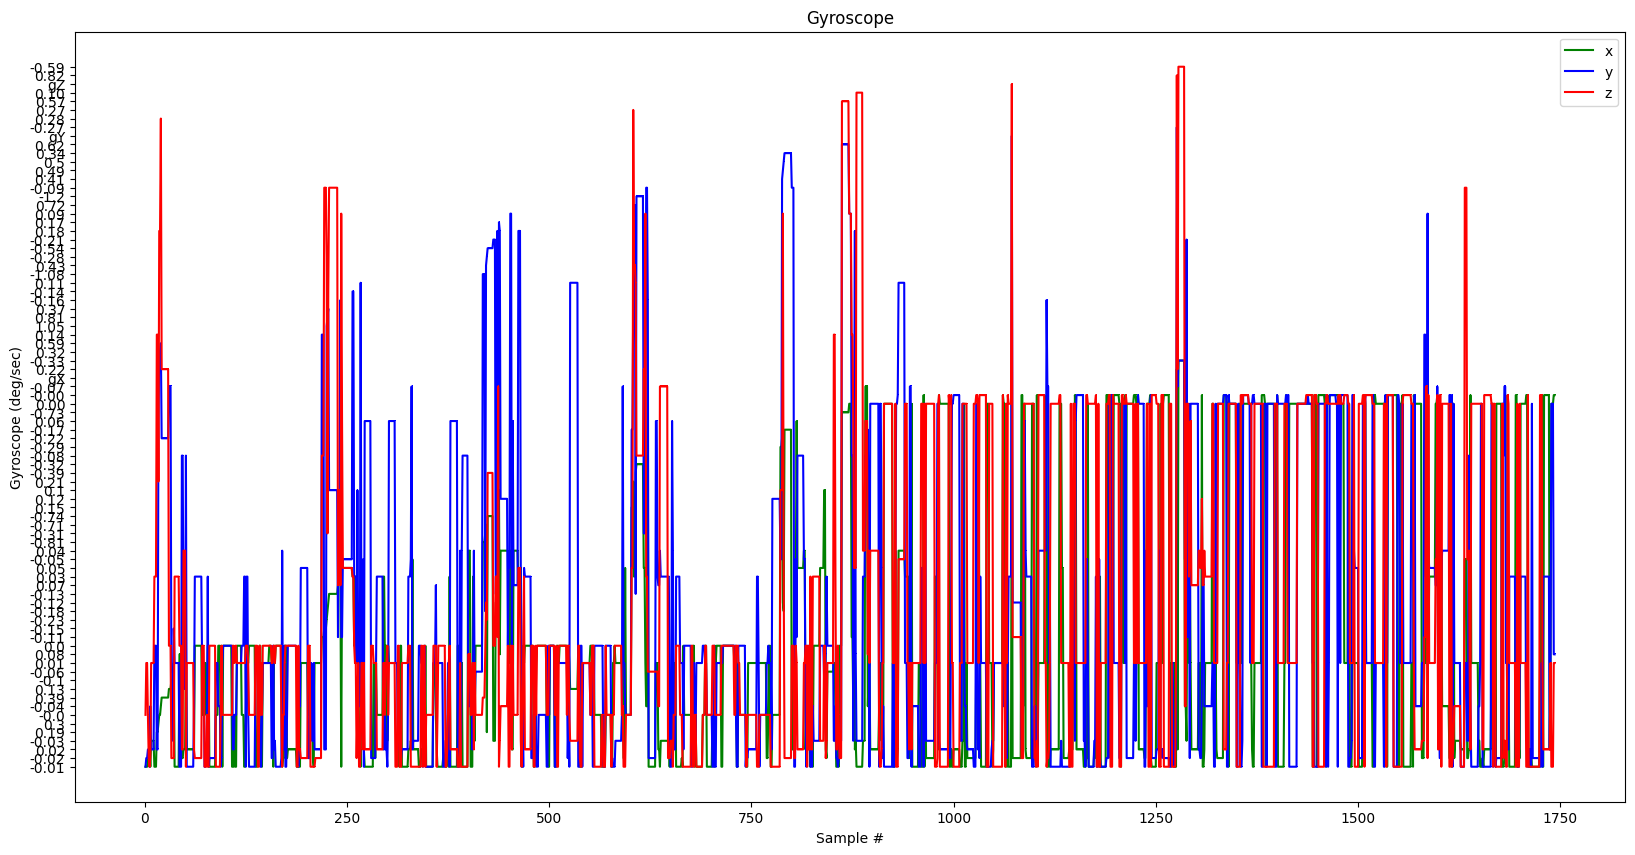

In [10]:
filename = "parado.csv"

df = pd.read_csv("/content/" + filename)

index = range(1, len(df['aX']) + 1)

plt.rcParams["figure.figsize"] = (20,10)

plt.plot(index, df['aX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['aY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['aZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Acceleration")
plt.xlabel("Sample #")
plt.ylabel("Acceleration (G)")
plt.legend()
plt.show()

plt.plot(index, df['gX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['gY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['gZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Gyroscope")
plt.xlabel("Sample #")
plt.ylabel("Gyroscope (deg/sec)")
plt.legend()
plt.show()

# Train Neural Network





## Parse and prepare the data

The next cell parses the csv files and transforms them to a format that will be used to train the fully connected neural network.

Update the `GESTURES` list with the gesture data you've collected in `.csv` format.


In [88]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

print(f"TensorFlow version = {tf.__version__}\n")

# Semente fixa para reprodutibilidade
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Lista de gestos e dispositivos
GESTURES = [
    "caminhando",
    "pulando",
    "parado",
]

DEVICES = ["SPU1", "SPU2", "SPU3", "SPU4"]

# 20 Hz (1 amostra a cada 50 ms).
# Se um gesto durar 1 segundos, você terá 1 segundos * 20 Hz = 20 amostras.
SAMPLES_PER_GESTURE = 20
NUM_GESTURES = len(GESTURES)

# Codificação one-hot para os gestos
ONE_HOT_ENCODED_GESTURES = np.eye(NUM_GESTURES)

inputs = []
outputs = []

# Iterar pelos gestos
for gesture_index, gesture in enumerate(GESTURES):
    print(f"Processing gesture: {gesture} (index {gesture_index})")
    output = ONE_HOT_ENCODED_GESTURES[gesture_index]

    # Ler o arquivo CSV correspondente ao gesto
    df = pd.read_csv(f"/content/{gesture}.csv")

    # Verificar dispositivos no arquivo
    for device in DEVICES:
        device_data = df[df["deviceID"] == device]
        num_samples = device_data.shape[0]

        if num_samples == 0:
            print(f"\tNo data for device {device}. Skipping.")
            continue

        print(f"\tDevice {device} has {num_samples} samples for gesture {gesture}.")

        # Verificar o número de gravações completas disponíveis
        num_recordings = num_samples // SAMPLES_PER_GESTURE
        print(f"\tProcessing {num_recordings} recordings for device {device}.")

        # Iterar pelas gravações
        for i in range(num_recordings):
            tensor = []
            for j in range(SAMPLES_PER_GESTURE):
                index = i * SAMPLES_PER_GESTURE + j
                row = device_data.iloc[index]

                # Normalizar os dados
                tensor += [
                    (row["aX"] + 4) / 8,  # Aceleração normalizada
                    (row["aY"] + 4) / 8,
                    (row["aZ"] + 4) / 8,
                    (row["gX"] + 2000) / 4000,  # Giroscópio normalizado
                    (row["gY"] + 2000) / 4000,
                    (row["gZ"] + 2000) / 4000,
                ]

            inputs.append(tensor)
            outputs.append(output)

# Converter as listas em arrays numpy
inputs = np.array(inputs)
outputs = np.array(outputs)

print("Data set parsing and preparation complete.")
print(f"Total inputs: {inputs.shape}")
print(f"Total outputs: {outputs.shape}")


TensorFlow version = 2.17.1

Processing gesture: caminhando (index 0)
	Device SPU1 has 838 samples for gesture caminhando.
	Processing 41 recordings for device SPU1.
	Device SPU2 has 1127 samples for gesture caminhando.
	Processing 56 recordings for device SPU2.
	Device SPU3 has 1032 samples for gesture caminhando.
	Processing 51 recordings for device SPU3.
	Device SPU4 has 949 samples for gesture caminhando.
	Processing 47 recordings for device SPU4.
Processing gesture: pulando (index 1)
	Device SPU1 has 515 samples for gesture pulando.
	Processing 25 recordings for device SPU1.
	Device SPU2 has 609 samples for gesture pulando.
	Processing 30 recordings for device SPU2.
	Device SPU3 has 513 samples for gesture pulando.
	Processing 25 recordings for device SPU3.
	Device SPU4 has 535 samples for gesture pulando.
	Processing 26 recordings for device SPU4.
Processing gesture: parado (index 2)
	Device SPU1 has 918 samples for gesture parado.
	Processing 45 recordings for device SPU1.
	Devi

## Randomize and split the input and output pairs for training

Randomly split input and output pairs into sets of data: 60% for training, 20% for validation, and 20% for testing.

  - the training set is used to train the model
  - the validation set is used to measure how well the model is performing during training
  - the testing set is used to test the model after training

In [89]:
# random date
num_inputs = len(inputs)
randomize = np.arange(num_inputs)
np.random.shuffle(randomize)

inputs = inputs[randomize]
outputs = outputs[randomize]

# split
TRAIN_SPLIT = int(0.6 * num_inputs)
TEST_SPLIT = int(0.2 * num_inputs + TRAIN_SPLIT)

inputs_train, inputs_test, inputs_validate = np.split(inputs, [TRAIN_SPLIT, TEST_SPLIT])
outputs_train, outputs_test, outputs_validate = np.split(outputs, [TRAIN_SPLIT, TEST_SPLIT])

print("Divisão dos dados concluída.")

Divisão dos dados concluída.


## Build & Train the Model

Build and train a [TensorFlow](https://www.tensorflow.org) model using the high-level [Keras](https://www.tensorflow.org/guide/keras) API.

In [90]:
from tensorflow.keras import regularizers

# total features
TOTAL_FEATURES = 6 * SAMPLES_PER_GESTURE  # 6 features por amostra, 40 amostras por gesto

# define model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=(TOTAL_FEATURES,), kernel_regularizer=regularizers.l2(0.0005)),
    tf.keras.layers.Dropout(0.5),  # Adiciona uma camada de dropout
    tf.keras.layers.Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.0005)),
    tf.keras.layers.Dropout(0.5),  # Outra camada de dropout
    tf.keras.layers.Dense(NUM_GESTURES, activation='softmax')
])

# compile with optimizer Adam
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'mae'])

# callback EarlyStopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# train model
history = model.fit(
    inputs_train,
    outputs_train,
    epochs=500,
    batch_size=32,
    validation_data=(inputs_validate, outputs_validate),
    callbacks=[early_stopping]  # Adiciona o callback de EarlyStopping

)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.3420 - loss: 1.5604 - mae: 0.4446 - val_accuracy: 0.4022 - val_loss: 1.1661 - val_mae: 0.4286
Epoch 2/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3877 - loss: 1.3732 - mae: 0.4293 - val_accuracy: 0.4348 - val_loss: 1.0728 - val_mae: 0.4073
Epoch 3/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4341 - loss: 1.2895 - mae: 0.4214 - val_accuracy: 0.5978 - val_loss: 1.0165 - val_mae: 0.3966
Epoch 4/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4803 - loss: 1.1148 - mae: 0.3944 - val_accuracy: 0.6196 - val_loss: 0.9849 - val_mae: 0.3890
Epoch 5/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4479 - loss: 1.1492 - mae: 0.4033 - val_accuracy: 0.6848 - val_loss: 0.9673 - val_mae: 0.3854
Epoch 6/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4858 - loss: 1.1628 - mae: 0.4059 - val_accuracy: 0.7174 - val_loss: 0.9553 - val_mae: 0.3821
Epoch 7/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accu

## Verify

Graph the models performance vs validation.


### Graph the loss

Graph the loss to see when the model stops improving.

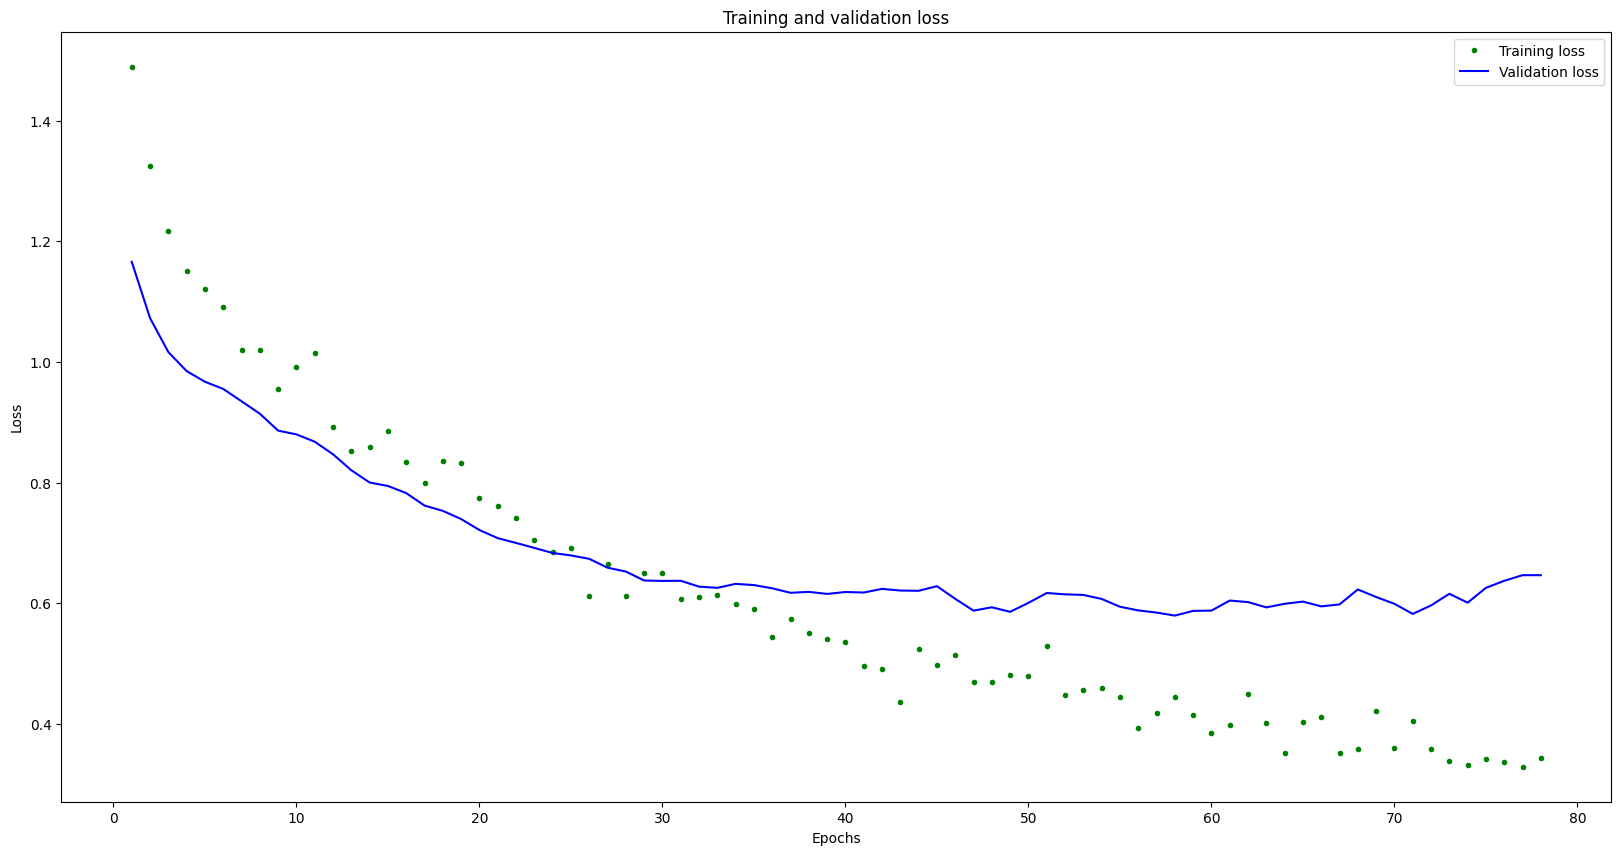

[20.0, 10.0]


In [91]:
# increase the size of the graphs. The default size is (6,4).
plt.rcParams["figure.figsize"] = (20,10)

# graph the loss, the model above is configure to use "mean squared error" as the loss function
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print(plt.rcParams["figure.figsize"])

### Graph the loss again, skipping a bit of the start

We'll graph the same data as the previous code cell, but start at index 100 so we can further zoom in once the model starts to converge.

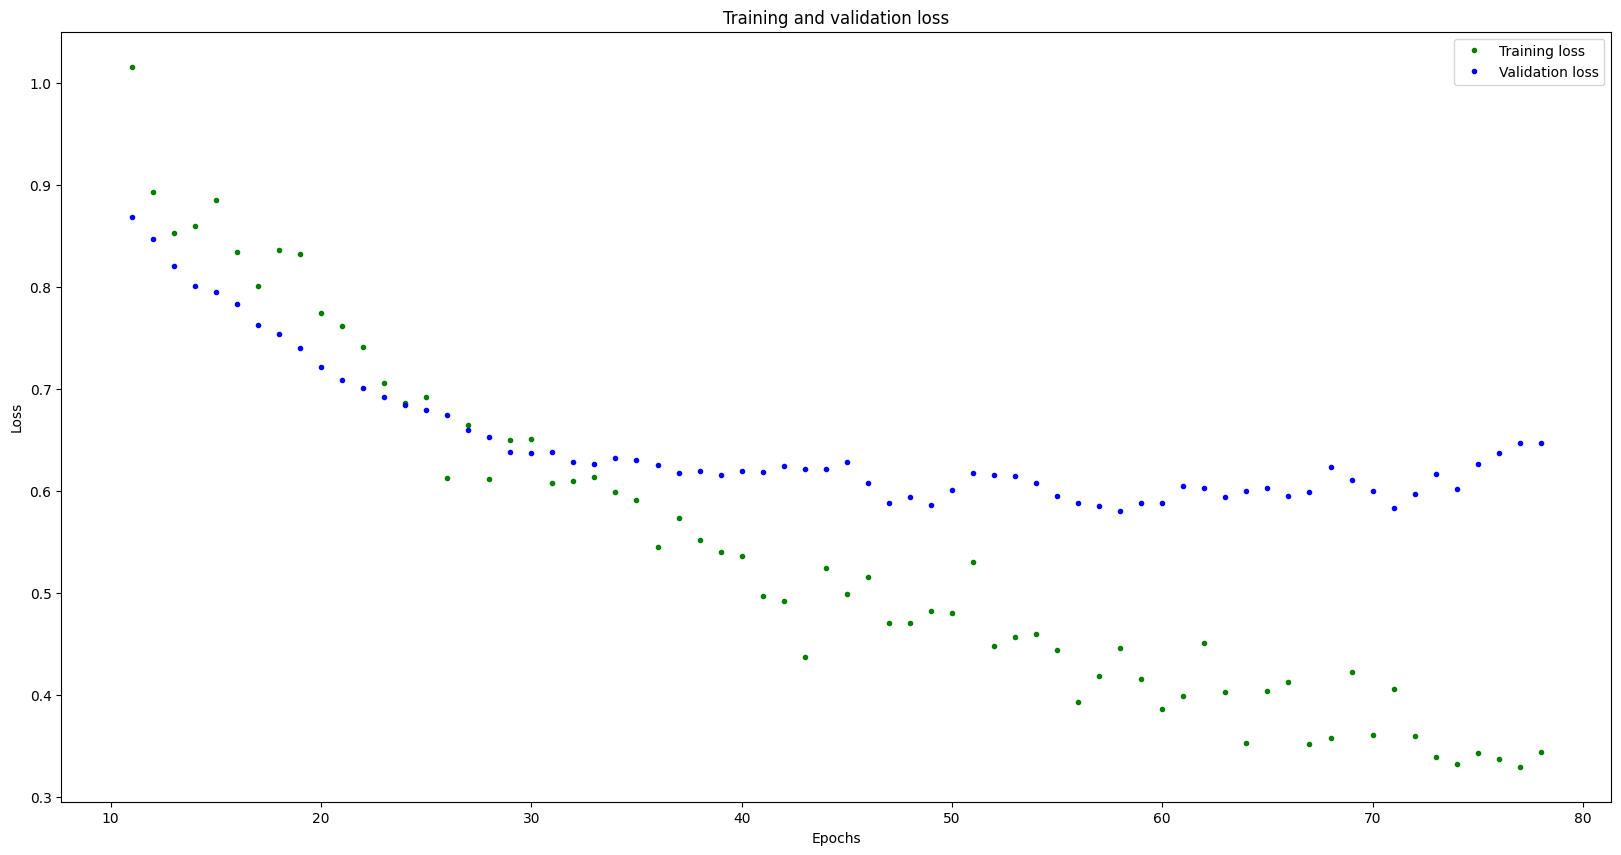

In [92]:
# graph the loss again skipping a bit of the start
SKIP = 10
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Graph the mean absolute error

[Mean absolute error](https://en.wikipedia.org/wiki/Mean_absolute_error) is another metric to judge the performance of the model.



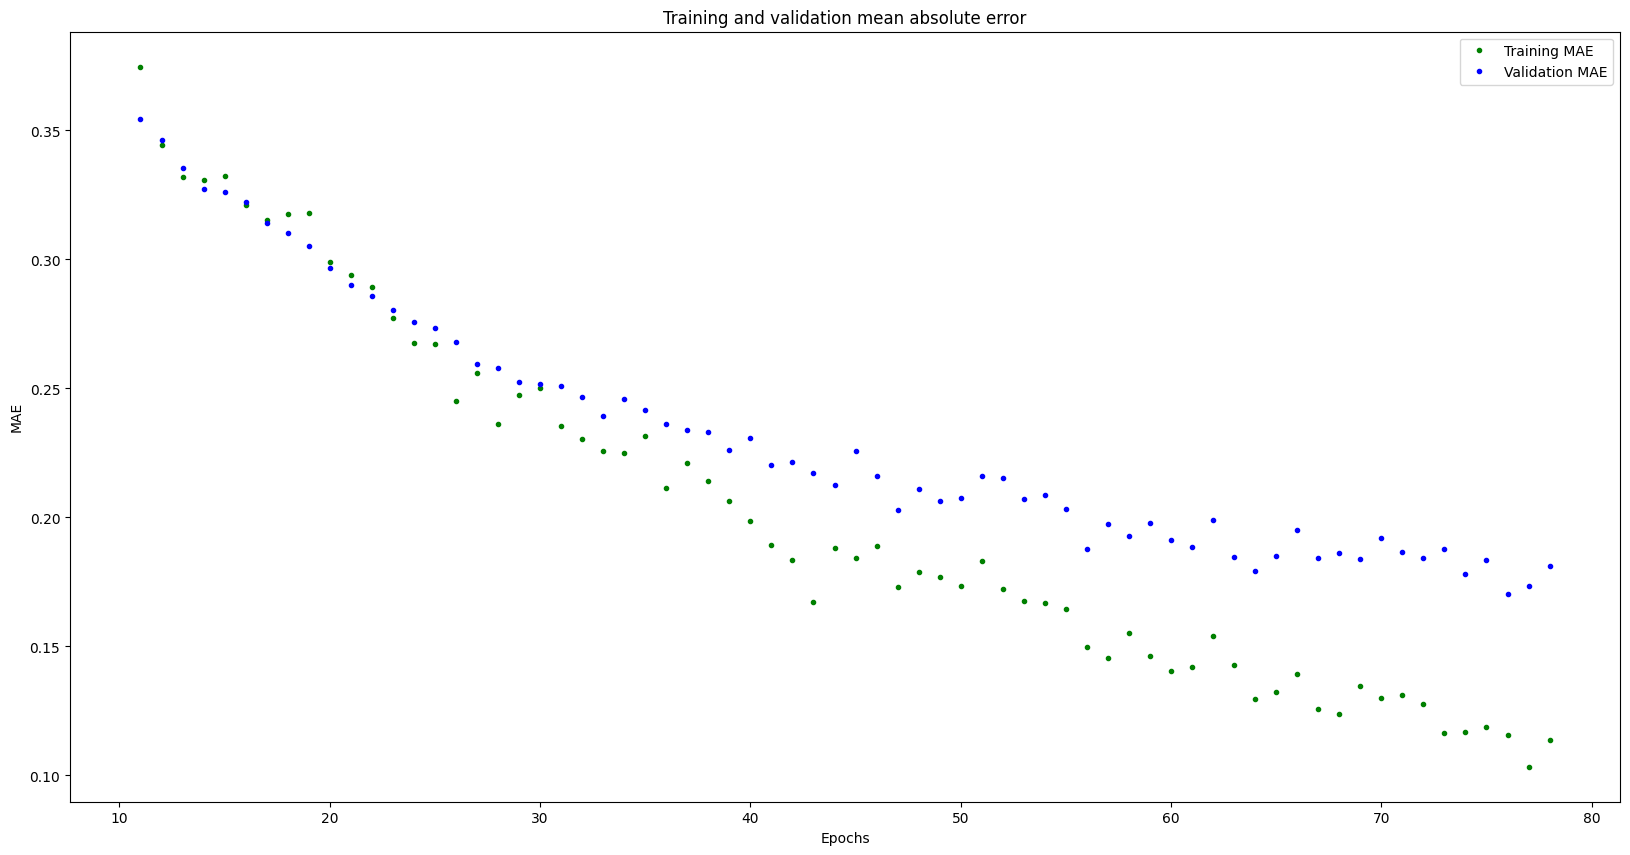

In [93]:
# graph of mean absolute error
mae = history.history['mae']
val_mae = history.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


### Run with Test Data
Put our test data into the model and plot the predictions


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
predictions =
 [[0.896 0.094 0.01 ]
 [0.23  0.006 0.764]
 [0.746 0.041 0.213]
 [0.656 0.028 0.316]
 [0.854 0.146 0.   ]
 [0.072 0.928 0.   ]
 [0.002 0.998 0.   ]
 [0.791 0.209 0.   ]
 [0.601 0.399 0.   ]
 [0.219 0.778 0.003]
 [0.92  0.045 0.035]
 [0.208 0.002 0.79 ]
 [0.166 0.834 0.   ]
 [0.533 0.45  0.017]
 [0.94  0.055 0.005]
 [0.004 0.996 0.   ]
 [0.284 0.013 0.703]
 [0.083 0.001 0.916]
 [0.708 0.144 0.148]
 [0.861 0.118 0.021]
 [0.193 0.007 0.8  ]
 [0.057 0.943 0.   ]
 [0.293 0.008 0.699]
 [0.168 0.003 0.828]
 [0.611 0.389 0.   ]
 [0.681 0.033 0.286]
 [0.149 0.001 0.85 ]
 [0.953 0.026 0.021]
 [0.033 0.967 0.   ]
 [0.802 0.113 0.085]
 [0.144 0.002 0.854]
 [0.217 0.009 0.774]
 [0.003 0.997 0.   ]
 [0.125 0.002 0.873]
 [0.315 0.014 0.672]
 [0.215 0.785 0.   ]
 [0.963 0.037 0.   ]
 [0.37  0.628 0.002]
 [0.588 0.401 0.012]
 [0.611 0.013 0.376]
 [0.925 0.054 0.02 ]
 [0.04  0.96  0.   ]
 [0.89  0.073 0.038]
 [0.325 0.675 0.   ]
 [0.792 0.141 0.066]
 [

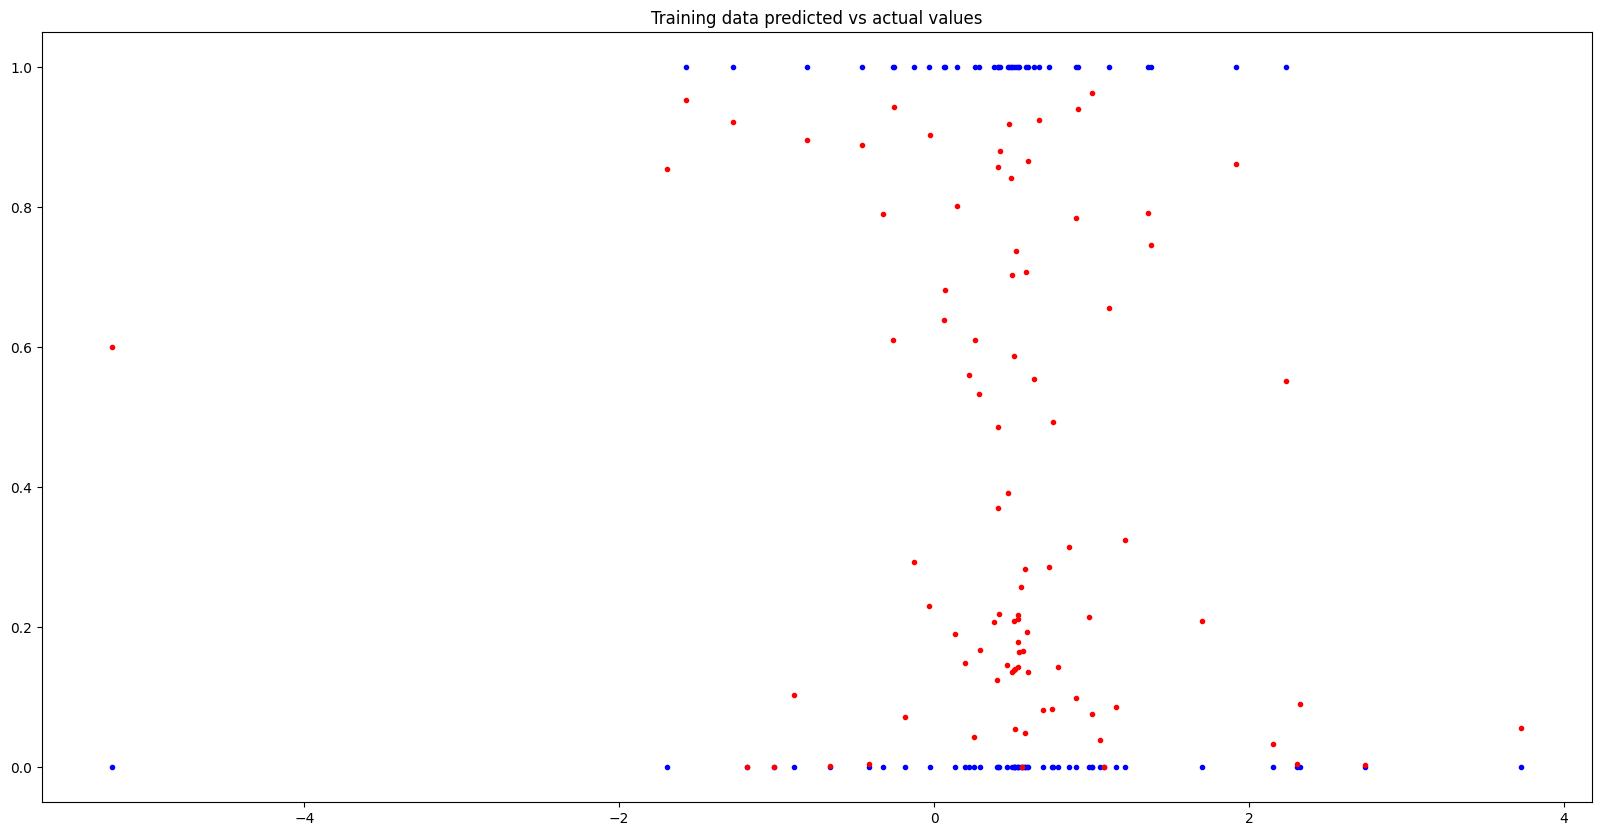

In [94]:
# use the model to predict the test inputs
predictions = model.predict(inputs_test)

# print the predictions and the expected ouputs
print("predictions =\n", np.round(predictions, decimals=3))
print("actual =\n", outputs_test)

# Plot the predictions along with to the test data
plt.clf()
plt.title('Training data predicted vs actual values')
# Assuming you want to plot the first feature of inputs_test against the first output:
plt.plot(inputs_test[:, 0], outputs_test[:, 0], 'b.', label='Actual')  # Plot first feature vs first output
plt.plot(inputs_test[:, 0], predictions[:, 0], 'r.', label='Predicted')  # Plot first feature vs first prediction
# You can change the column indices (0) to plot other features/outputs
plt.show()

In [95]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [96]:

# Encontrando a classe com maior probabilidade
predicted_classes = np.argmax(predictions, axis=1)
actual_classes = np.argmax(outputs_test, axis=1) # Changed 'actual' to 'outputs_test'

# Calculando a acurácia
accuracy = np.mean(predicted_classes == actual_classes)
print("Accuracy:", accuracy)


Accuracy: 0.8333333333333334


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


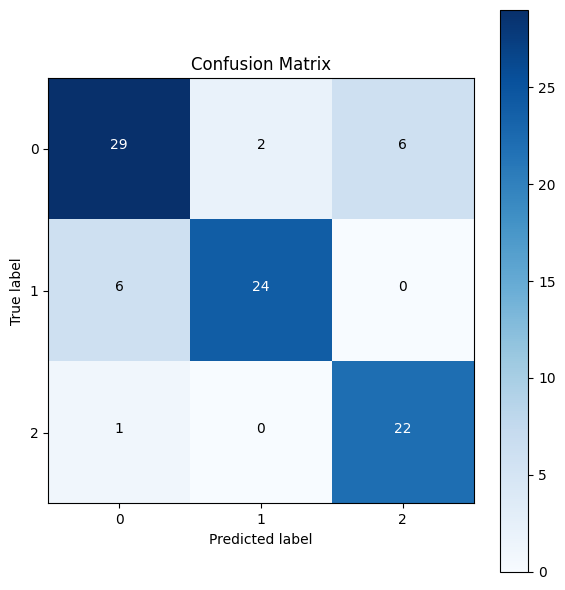

In [97]:
# Use the model to predict the test inputs
predictions = model.predict(inputs_test)

# Assuming the outputs are binary or multi-class labels
predictions_classes = np.argmax(predictions, axis=1)  # if it's multi-class classification, adjust as needed
outputs_classes = np.argmax(outputs_test, axis=1)  # The actual labels, adjust if needed

# Generate confusion matrix
cm = confusion_matrix(outputs_classes, predictions_classes)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks(np.arange(cm.shape[1]), np.arange(cm.shape[1]))
plt.yticks(np.arange(cm.shape[0]), np.arange(cm.shape[0]))

# Add labels
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

# 0 - caminhando
# 1 - pulando
# 3 - parado

# Convert the Trained Model to Tensor Flow Lite

The next cell converts the model to TFlite format. The size in bytes of the model is also printed out.

In [98]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to disk
open("gesture_model.tflite", "wb").write(tflite_model)

import os
basic_model_size = os.path.getsize("gesture_model.tflite")
print("Model is %d bytes" % basic_model_size)



Saved artifact at '/tmp/tmp84x0xerp'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 120), dtype=tf.float32, name='keras_tensor_120')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  139594716717200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139594716711040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139594716709280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139594716719136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139594716717024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139594716721600: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model is 71332 bytes


## Encode the Model in an Arduino Header File

The next cell creates a constant byte array that contains the TFlite model. Import it as a tab with the sketch below.

In [101]:
!echo "const unsigned char model[] = {" > /content/model.h
!cat gesture_model.tflite | xxd -i      >> /content/model.h
!echo "};"                              >> /content/model.h

import os
model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")
print("\nOpen the side panel (refresh if needed). Double click model.h to download the file.")

Header file, model.h, is 439,916 bytes.

Open the side panel (refresh if needed). Double click model.h to download the file.


# IMU Data to Test Arduino




In [102]:
import pandas as pd

# Função para processar cada arquivo CSV e extrair as 20 primeiras amostras para cada dispositivo
def process_file(file_name):
    # Carregar o arquivo CSV
    df = pd.read_csv(file_name)

    # Filtra os dados para pegar amostras por deviceID
    device_ids = df['deviceID'].unique()

    # Armazenar as amostras para cada deviceID
    samples = {}

    # Itera por cada deviceID único
    for device_id in device_ids:
        # Filtra os dados para o deviceID atual
        device_data = df[df['deviceID'] == device_id]

        # Se houver pelo menos 20 amostras, pega as 20 primeiras
        if len(device_data) >= 20:
            first_20_samples = device_data.head(20)  # Pega as primeiras 20 amostras

            # Extrai as colunas de aceleração e giroscópio
            acceleration_gyro_data = first_20_samples[['aX', 'aY', 'aZ', 'gX', 'gY', 'gZ']].values
            samples[device_id] = acceleration_gyro_data

    # Imprimir os resultados no formato solicitado
    for device_id, data in samples.items():
        print(f"Device ID: {device_id}")
        for row in data:
            # Formatar e imprimir as amostras no formato desejado
            print(f"{{{row[0]:.2f}, {row[1]:.2f}, {row[2]:.2f}, {row[3]:.2f}, {row[4]:.2f}, {row[5]:.2f}}},")
        print("\n")  # Linha em branco para separar os deviceIDs

# Arquivos CSV que você quer processar
files = ["caminhando.csv", "pulando.csv", "parado.csv"]

# Processar cada arquivo
for file in files:
    print(f"Processando arquivo: {file}")
    process_file(file)


Processando arquivo: caminhando.csv
Device ID: SPU2
{0.77, -15.83, -0.59, 0.17, 3.48, 1.73},
{0.77, -15.83, -0.59, 0.81, 1.74, 2.18},
{0.77, -15.83, -0.59, 1.96, -2.24, 1.85},
{4.22, -7.94, -4.92, 1.96, -2.24, 1.85},
{0.81, -9.39, -4.15, 1.96, -2.24, 1.85},
{4.11, -6.75, -4.73, 1.96, -2.24, 1.85},
{0.31, -4.04, -3.27, 1.96, -2.24, 1.85},
{-0.49, -4.15, -2.31, 1.96, -2.24, 1.85},
{-9.99, -25.75, 0.02, 1.96, -2.24, 1.85},
{6.06, -4.07, -5.03, 1.96, -2.24, 1.85},
{-9.49, -20.43, -5.37, 1.96, -2.24, 1.85},
{6.75, -12.04, -2.93, 1.96, -2.24, 1.85},
{6.75, -12.04, -2.93, -0.51, 0.41, -0.11},
{-0.37, -9.86, -3.92, -0.51, 0.41, -0.11},
{-0.37, -9.86, -3.92, -0.21, 0.29, -0.11},
{-0.37, -9.86, -3.92, -0.52, 0.64, -0.12},
{-0.37, -9.86, -3.92, -0.86, 0.59, -0.21},
{-0.37, -9.86, -3.92, -1.12, 1.29, -0.22},
{-0.37, -9.86, -3.92, -1.91, 1.40, -0.55},
{1.20, -12.35, 0.10, -1.91, 1.40, -0.55},


Device ID: SPU4
{1.82, 9.49, -0.93, 0.13, -0.05, 0.08},
{2.25, 9.46, -1.23, 0.13, -0.05, 0.08},
{2.25, 9.